In [46]:

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from pandas import DataFrame
from sklearn.svm import SVC
%matplotlib inline 
import plotly.express as px
from sklearn.metrics import confusion_matrix,classification_report

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
ad_data =  pd.read_csv('/content/gdrive/MyDrive/MACHINE LEARNING ALGORITHM 1/13-Logistic-Regression/advertising.csv')

In [4]:
ad_data.head(5)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [11]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [12]:
ad_data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


In [13]:
ad_data.isnull().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



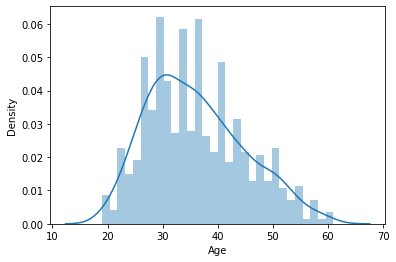

In [16]:
sns.distplot(ad_data['Age'],bins=30)

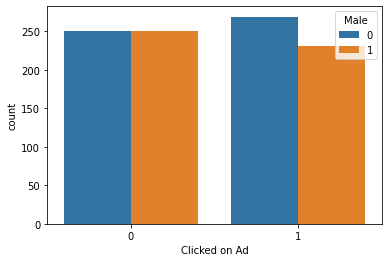

In [20]:
  sns.countplot(x='Clicked on Ad',hue='Male',data=ad_data)

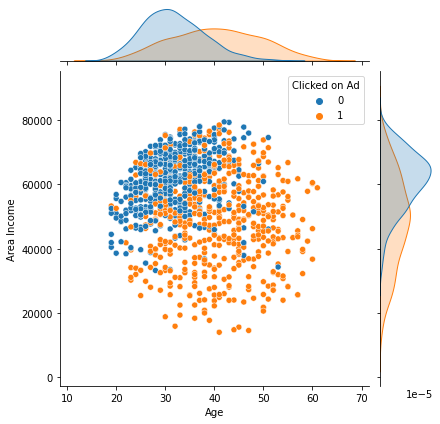

In [22]:
sns.jointplot(x='Age',y='Area Income',data=ad_data,hue='Clicked on Ad')

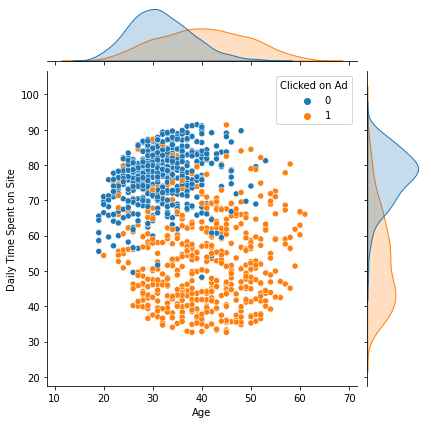

In [23]:
sns.jointplot(x='Age',y='Daily Time Spent on Site',data=ad_data,hue='Clicked on Ad')

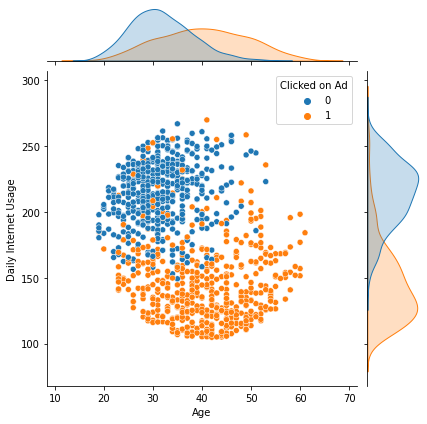

In [25]:
sns.jointplot(x='Age',y='Daily Internet Usage',data=ad_data,hue='Clicked on Ad')

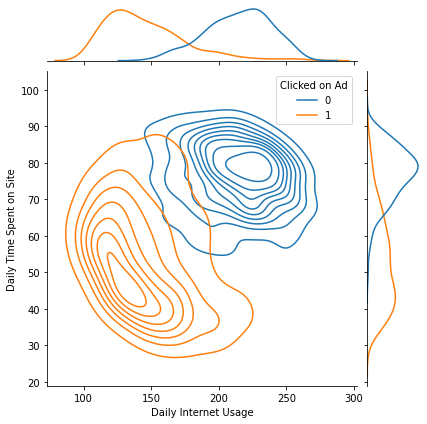

In [38]:
sns.jointplot(x='Daily Internet Usage',y='Daily Time Spent on Site',data=ad_data,kind='kde',hue='Clicked on Ad',color='green')

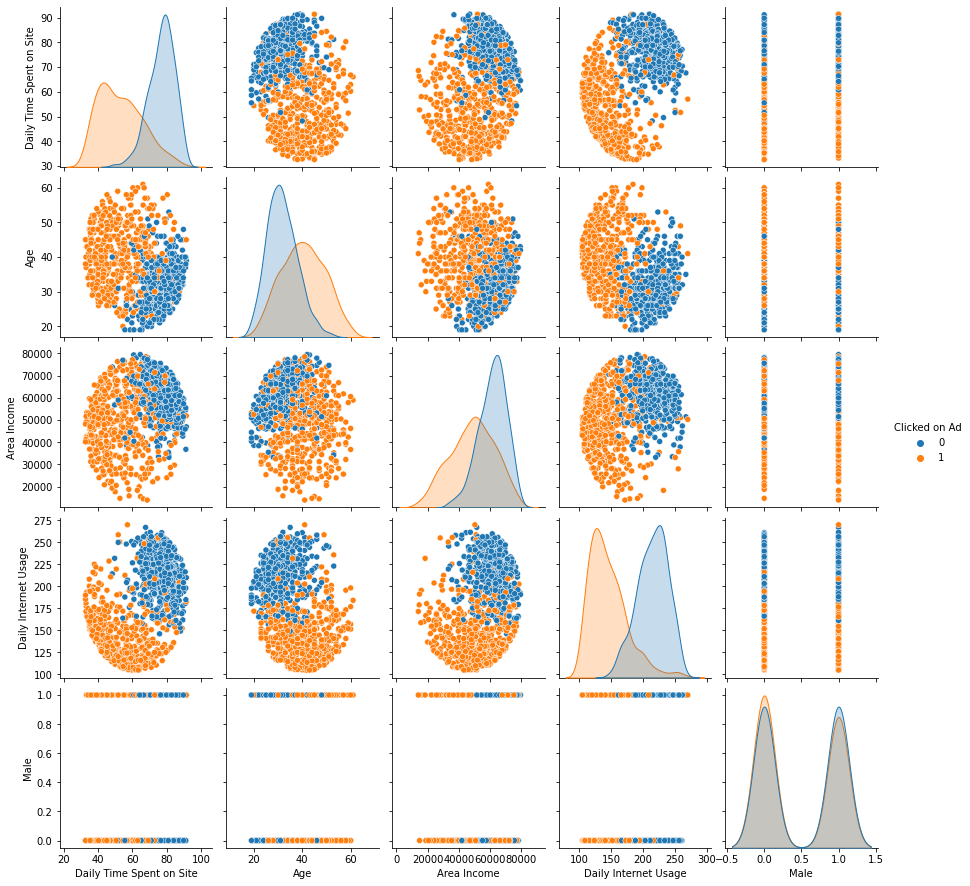

In [39]:
sns.pairplot(ad_data,hue='Clicked on Ad')

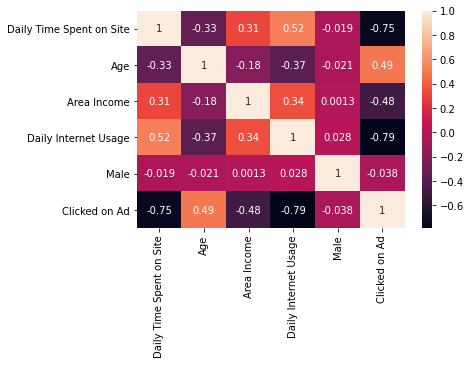

In [24]:
sns.heatmap(ad_data.corr(),annot=True)

In [71]:
x = ad_data.drop(['Ad Topic Line','City','Country','Timestamp'],axis=1)
y = ad_data['Clicked on Ad']

In [72]:
sd = StandardScaler().fit(x)
x_sd = sd.transform(x)
norm = MinMaxScaler().fit(x)
x_norm = norm.transform(x)


In [73]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=101)

In [74]:
x_train1,x_test1,y_train1,y_test1 = train_test_split(x_norm,y,test_size=0.3,random_state=101)

In [75]:
x_train2,x_test2,y_train2,y_test2 = train_test_split(x_sd,y,test_size=0.3,random_state=101)

In [76]:
lr = LogisticRegression(n_jobs=-1,random_state=101)
lr.fit(x_train,y_train)
prediction = lr.predict(x_test)


In [77]:
lr1 = LogisticRegression(n_jobs=-1,random_state=101)
lr1.fit(x_train1,y_train1)
prediction1 = lr1.predict(x_test1)

In [78]:
lr2 = LogisticRegression(n_jobs=-1,random_state=101)
lr2.fit(x_train2,y_train2)
prediction2 = lr2.predict(x_test2)

In [58]:
print('CLASSIFICATION FOR LOGISTIC REGRESSION : \n{}'.format(classification_report(y_test,prediction)))

CLASSIFICATION FOR LOGISTIC REGRESSION : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       157
           1       1.00      1.00      1.00       143

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



In [59]:
print('ACCURACY SCORE : {}'.format(accuracy_score(y_test,prediction)*100))

ACCURACY SCORE : 100.0


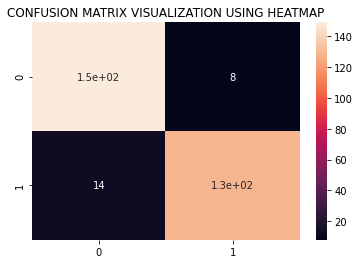

In [89]:
sns.heatmap(confusion_matrix(y_test,prediction),annot=True)
plt.title('CONFUSION MATRIX VISUALIZATION USING HEATMAP')
plt.show()

In [80]:
print('CLASSIFICATION REPORT FOR LOGISTIC REGRESSION  WITH NORMALIZED DATA: \n{}'.format(classification_report(y_test1,prediction1)))

CLASSIFICATION REPORT FOR LOGISTIC REGRESSION  WITH NORMALIZED DATA: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       157
           1       1.00      1.00      1.00       143

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



In [81]:
print('ACCURACY SCORE FOR NORMALIZED DATA: {}'.format(accuracy_score(y_test1,prediction1)*100))

ACCURACY SCORE FOR NORMALIZED DATA: 100.0


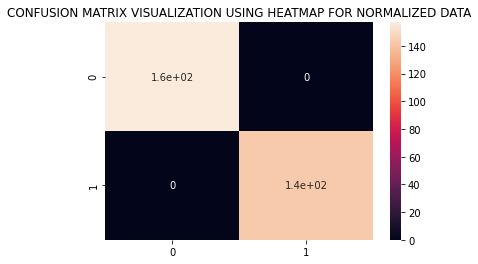

In [88]:
sns.heatmap(confusion_matrix(y_test1,prediction1),annot=True)
plt.title('CONFUSION MATRIX VISUALIZATION USING HEATMAP FOR NORMALIZED DATA')
plt.show()

In [84]:
print('CLASSIFICATION REPORT FOR LOGISTIC REGRESSION  WITH STANDARDIZED DATA: \n{}'.format(classification_report(y_test2,prediction2)))

CLASSIFICATION REPORT FOR LOGISTIC REGRESSION  WITH STANDARDIZED DATA: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       157
           1       1.00      1.00      1.00       143

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



In [85]:
print('ACCURACY SCORE FOR NORMALIZED DATA: {}'.format(accuracy_score(y_test2,prediction2)*100))

ACCURACY SCORE FOR NORMALIZED DATA: 100.0


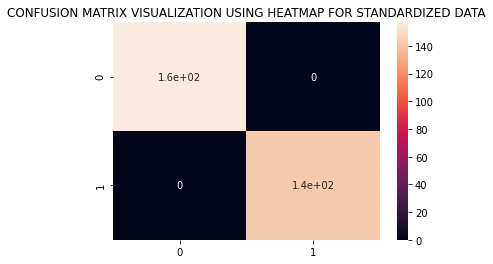

In [87]:
sns.heatmap(confusion_matrix(y_test2,prediction2),annot=True)
plt.title('CONFUSION MATRIX VISUALIZATION USING HEATMAP FOR STANDARDIZED DATA')
plt.show()

**WE ACHIEVE 100% ACCURACY FOR CLICKED ON ADVERTISMENT USING LOGITIC REGRESSION AND STANDARDIZED DATA AND NORMALIZED DATA AND A EFFICIENCY OF 92% WITH RAW DATA**